In [28]:
# ==============================
# 1. IMPORT LIBRARIES
# ==============================
print("Importing required libraries...")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print("All necessary libraries imported successfully!\n")

Importing required libraries...
All necessary libraries imported successfully!



Loading Fashion-MNIST dataset...
Original Training set shape: (60000, 28, 28), (60000,)
Original Test set shape: (10000, 28, 28), (10000,)



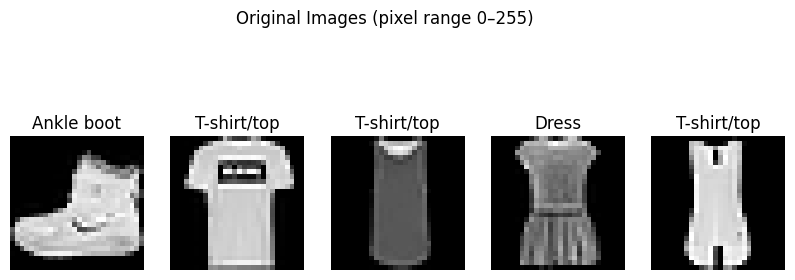

In [29]:
# ==============================
# 2. LOAD DATASET
# ==============================
print("Loading Fashion-MNIST dataset...")
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(f"Original Training set shape: {x_train.shape}, {y_train.shape}")
print(f"Original Test set shape: {x_test.shape}, {y_test.shape}\n")

# Class labels
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Display first 5 images
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.suptitle("Original Images (pixel range 0–255)")
plt.show()

In [30]:
# ==============================
# 3. PREPROCESSING
# ==============================
print("Preprocessing data: Normalizing and reshaping...")

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Preprocessing completed successfully!")
print(f"Processed training shape: {x_train.shape}, {y_train_cat.shape}\n")

Preprocessing data: Normalizing and reshaping...
Preprocessing completed successfully!
Processed training shape: (60000, 28, 28, 1), (60000, 10)



In [31]:

# ==============================
# 4. BUILD CNN MODEL
# ==============================
print("Building CNN model...")

def create_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(10, activation="softmax")
    ])
    return model

print("CNN model built successfully!\n")

Building CNN model...
CNN model built successfully!



In [32]:
# ==============================
# 5. BASELINE CNN TRAINING (No Augmentation)
# ==============================
print("Compiling and training Baseline CNN...")
baseline_model = create_cnn()
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_baseline = baseline_model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test_cat),
    verbose=1
)
print("Baseline CNN training completed!\n")

Compiling and training Baseline CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 56ms/step - accuracy: 0.7266 - loss: 0.7576 - val_accuracy: 0.8544 - val_loss: 0.3909
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.8657 - loss: 0.3755 - val_accuracy: 0.8800 - val_loss: 0.3303
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.8866 - loss: 0.3172 - val_accuracy: 0.8857 - val_loss: 0.3111
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.8979 - loss: 0.2793 - val_accuracy: 0.8963 - val_loss: 0.2835
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9054 - loss: 0.2601 - val_accuracy: 0.9054 - val_loss: 0.2603
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9126 - loss: 0.2333 - val_accuracy: 0.9058 - val_loss: 0.2573
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9207 - loss: 0.2149 - val_accuracy: 0.9071 - val_loss: 0.2540
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9266 - loss: 0.1970 - 

In [33]:
# ==============================
# 6. CNN WITH DATA AUGMENTATION
# ==============================
print("Setting up data augmentation...")
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)
print("Data augmentation ready!\n")

print("Compiling and training CNN with data augmentation...")
aug_model = create_cnn()
aug_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_aug = aug_model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test_cat),
    verbose=1
)
print("CNN with data augmentation training completed!\n")

Setting up data augmentation...
Data augmentation ready!

Compiling and training CNN with data augmentation...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 78ms/step - accuracy: 0.6113 - loss: 1.0510 - val_accuracy: 0.7859 - val_loss: 0.5379
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.7652 - loss: 0.6151 - val_accuracy: 0.8165 - val_loss: 0.4762
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.7879 - loss: 0.5621 - val_accuracy: 0.8391 - val_loss: 0.4333
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.8053 - loss: 0.5146 - val_accuracy: 0.8428 - val_loss: 0.4098
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 74ms/step - accuracy: 0.8141 - loss: 0.4920 - val_accuracy: 0.8568 - val_loss: 0.3843
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.8310 - loss: 0.4523 - val_accuracy: 0.8676 - val_loss: 0.3621
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.8377 - loss: 0.4352 - val_accuracy: 0.8786 - val_loss: 0.3335
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.8459 - loss: 0.4198 - val_accurac

Baseline CNN Test Accuracy : 0.9107
Augmented CNN Test Accuracy: 0.8869



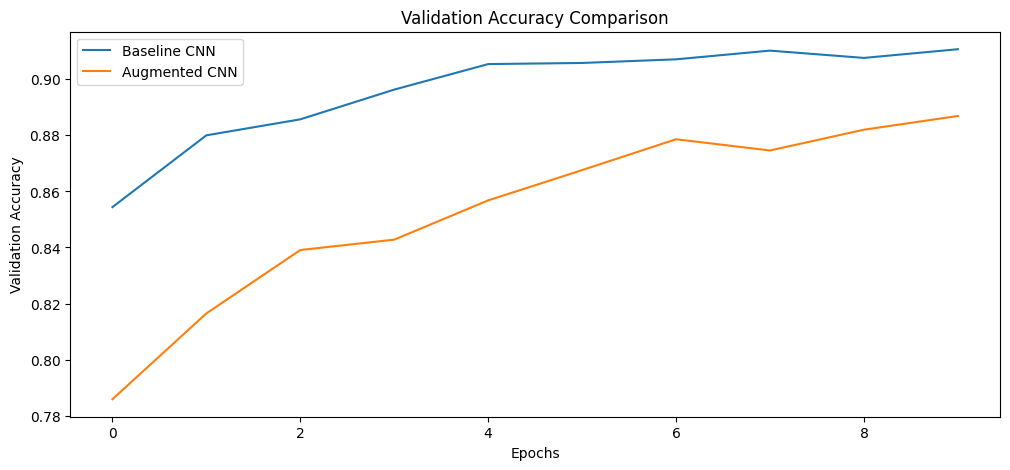

In [34]:
# ==============================
# 7. PLOT ACCURACY COMPARISON & DISPLAY TEST ACCURACY
# ==============================
# Evaluate baseline CNN
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Baseline CNN Test Accuracy : {baseline_test_acc:.4f}")

# Evaluate augmented CNN
aug_test_loss, aug_test_acc = aug_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Augmented CNN Test Accuracy: {aug_test_acc:.4f}\n")

# Plot validation accuracy over epochs
plt.figure(figsize=(12,5))
plt.plot(history_baseline.history['val_accuracy'], label='Baseline CNN')
plt.plot(history_aug.history['val_accuracy'], label='Augmented CNN')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

Evaluating model on test set...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


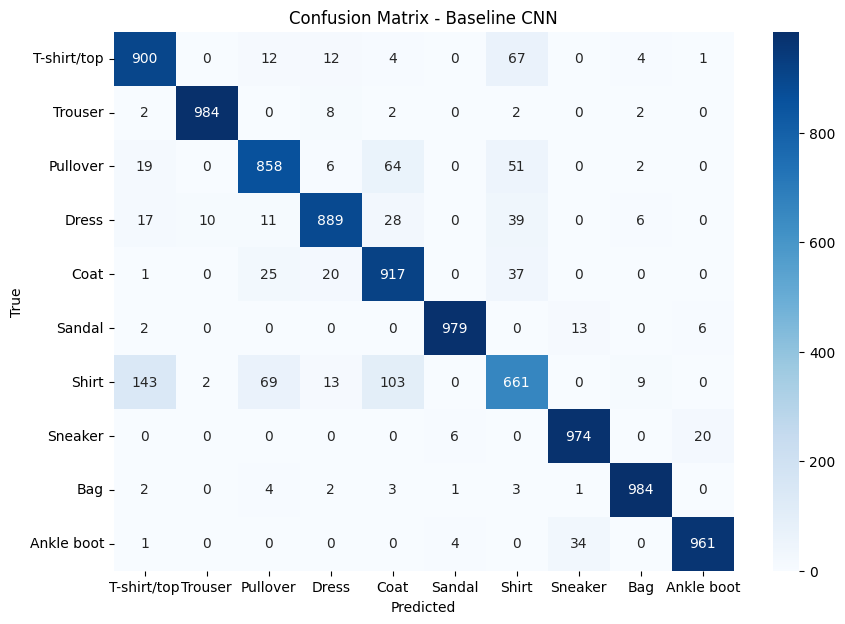


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.90      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.86      0.87      1000
       Dress       0.94      0.89      0.91      1000
        Coat       0.82      0.92      0.86      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.77      0.66      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Test Accuracy: 0.9107
Test Loss    : 0.2459


In [39]:
# ==============================
# 8.1 TEST EVALUATION & CONFUSION MATRIX
# ==============================
print("Evaluating model on test set...")

# --- Predictions ---
y_pred_probs = baseline_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# --- Confusion Matrix (heatmap with seaborn) ---
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Baseline CNN")
plt.show()

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# --- Overall Test Accuracy & Loss ---
test_loss, test_acc = baseline_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss    : {test_loss:.4f}")


Plotting training history and sample prediction...


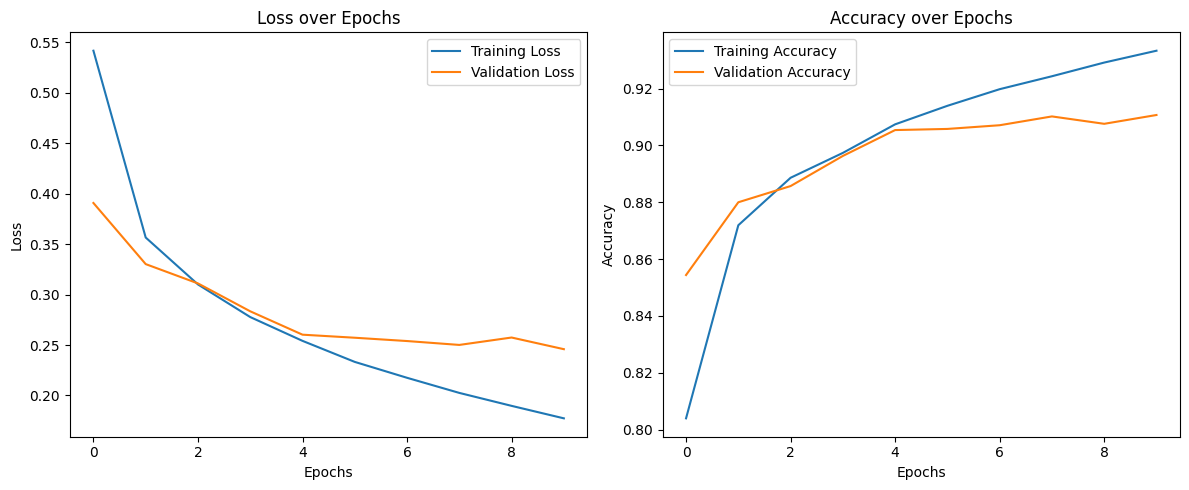

Predicting random sample...


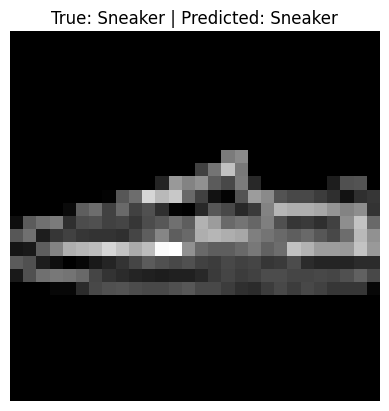

Training history and sample prediction displayed successfully!


In [42]:
# ==============================
# 8.2 TRAINING HISTORY & SAMPLE PREDICTION
# ==============================
print("Plotting training history and sample prediction...")

# --- Training History Plots ---
plt.figure(figsize=(12,5))

# Loss over epochs
plt.subplot(1,2,1)
plt.plot(history_baseline.history['loss'], label="Training Loss")
plt.plot(history_baseline.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy over epochs
plt.subplot(1,2,2)
plt.plot(history_baseline.history['accuracy'], label="Training Accuracy")
plt.plot(history_baseline.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

# --- Sample Prediction Demo ---
print("Predicting random sample...")
import random
idx = random.randint(0, x_test.shape[0]-1)
plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
plt.title(f"True: {class_names[y_true[idx]]} | Predicted: {class_names[y_pred_classes[idx]]}")
plt.axis('off')
plt.show()

print("Training history and sample prediction displayed successfully!")


In [43]:
# ==============================
# 9. SAVE THE TRAINED MODEL
# ==============================
model.save("fashion_mnist_cnn.h5")
print("Model saved as fashion_mnist_cnn.h5")

Model saved as fashion_mnist_cnn.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Top 5 Predictions:
1. Pomeranian: 96.49%
2. Persian_cat: 0.64%
3. Pekinese: 0.57%
4. Samoyed: 0.33%
5. keeshond: 0.23%


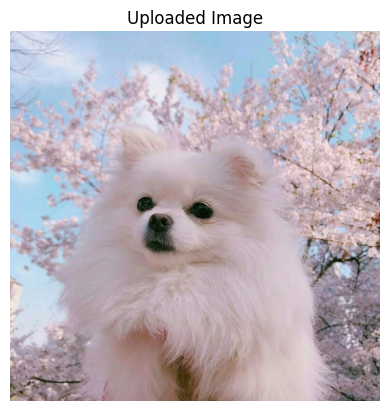

In [46]:
# ==============================
# REAL-WORLD IMAGE PREDICTION (Using ResNet50 which has pre-trained CNN models)
# ==============================
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load pretrained ResNet50 model
resnet_model = ResNet50(weights="imagenet")

# Path to your uploaded image
uploaded_image_path = "/content/pomeranians_dogs.jpg"

# Load and preprocess image (ResNet expects 224x224 RGB)
img = image.load_img(uploaded_image_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict
preds = resnet_model.predict(img_array)

# Decode top 5 predictions
decoded_preds = decode_predictions(preds, top=5)[0]

print("Top 5 Predictions:")
for i, (imagenetID, label, score) in enumerate(decoded_preds):
    print(f"{i+1}. {label}: {score*100:.2f}%")

# Show uploaded image
plt.imshow(image.load_img(uploaded_image_path))
plt.axis("off")
plt.title("Uploaded Image")
plt.show()
